In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import pickle

In [9]:
# Load dataset from file
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display basic dataset information
print("\nDataset Info:")
print(data.info())

Dataset Preview:
   Attendance  MSE  HRS  ESE
0          70   10   17   42
1          92    7   20   39
2          67    3   18   32
3          82   16   13   50
4          80    9   10   44

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Attendance  73 non-null     int64
 1   MSE         73 non-null     int64
 2   HRS         73 non-null     int64
 3   ESE         73 non-null     int64
dtypes: int64(4)
memory usage: 2.4 KB
None


In [10]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# If there are missing values, fill them with the column mean
data.fillna(data.mean(), inplace=True)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data[['Attendance', 'MSE', 'HRS']] = scaler.fit_transform(data[['Attendance', 'MSE', 'HRS']]) # Only scale input features

# Save the scaler to a file
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"\nScaler saved to: scaler.pkl")

# Split dataset into features (X) and target variable (y)
X = data[['Attendance', 'MSE', 'HRS']]  # Independent variables
y = data['ESE']  # Dependent variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing data split complete!")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Missing Values:
Attendance    0
MSE           0
HRS           0
ESE           0
dtype: int64

Scaler saved to: scaler.pkl

Training and testing data split complete!
Training samples: 58, Testing samples: 15


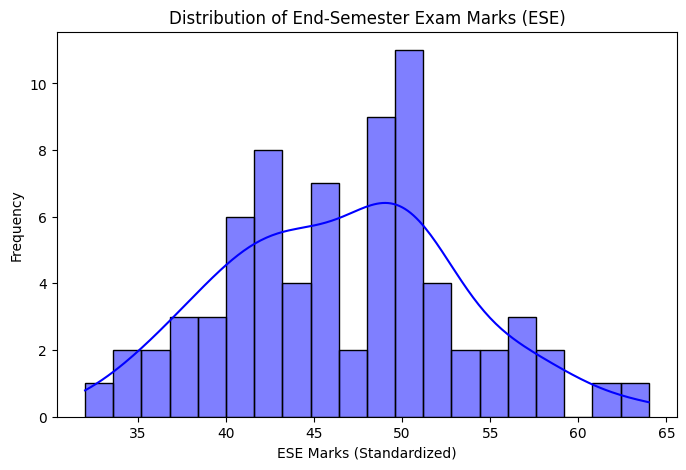

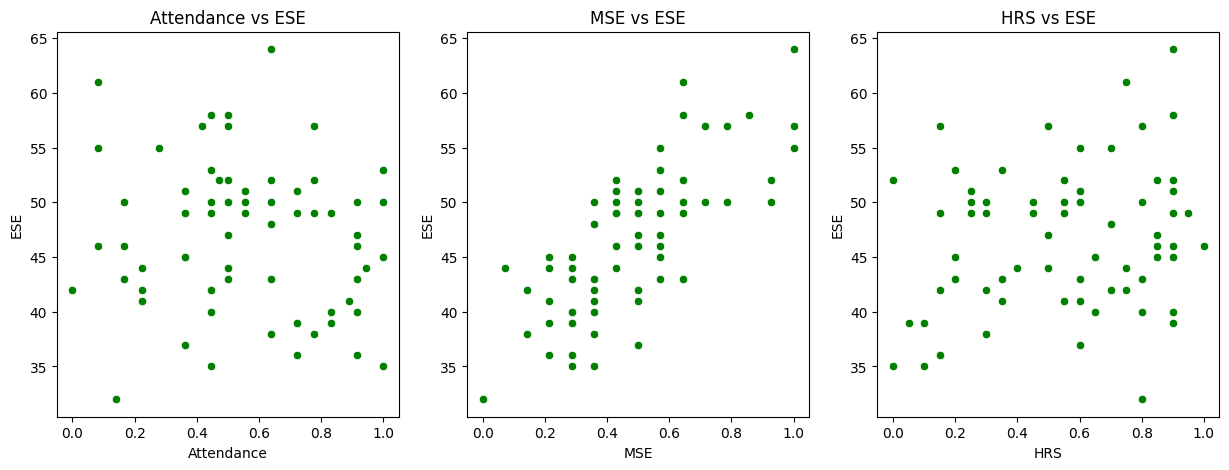

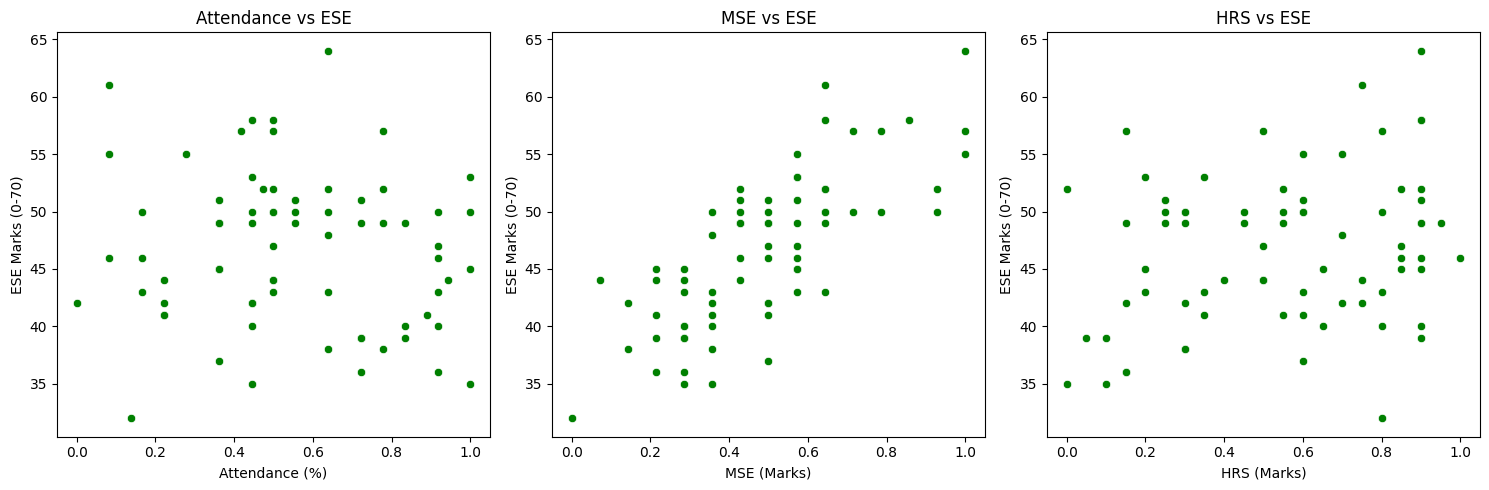

In [11]:
# Visualize the distribution of the target variable (ESE)
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=20, color='blue')
plt.title('Distribution of End-Semester Exam Marks (ESE)')
plt.xlabel('ESE Marks (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Scatter plots to analyze relationships between features and ESE
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Attendance', 'MSE', 'HRS'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[col], y=data['ESE'], color='green')
    plt.title(f'{col} vs ESE')
    plt.xlabel(col)
    plt.ylabel('ESE')

# Scatter plots with updated labels and units
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Attendance', 'MSE', 'HRS'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[col], y=data['ESE'], color='green')
    plt.title(f'{col} vs ESE')
    plt.xlabel(f'{col} ({"%" if col == "Attendance" else "Marks"})') # Add units to x-axis labels
    plt.ylabel('ESE Marks (0-70)') # Add units to y-axis label

plt.tight_layout()
plt.show()

In [12]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Model Coefficients:
Intercept: 35.250828028804136
Coefficients: [-1.99043864 23.61156758  2.07302671]


In [13]:
# Get feature importances
feature_importances = model.coef_ # For Linear Regression, coefficients represent feature importance

# Print feature importances
print("\nFeature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]:.3f}")


Feature Importances:
Attendance: -1.990
MSE: 23.612
HRS: 2.073



Evaluation Metrics:
Mean Squared Error (MSE): 18.582
Root Mean Squared Error (RMSE): 4.311
Mean Absolute Error (MAE): 3.910
R-Squared (R^2): 0.527


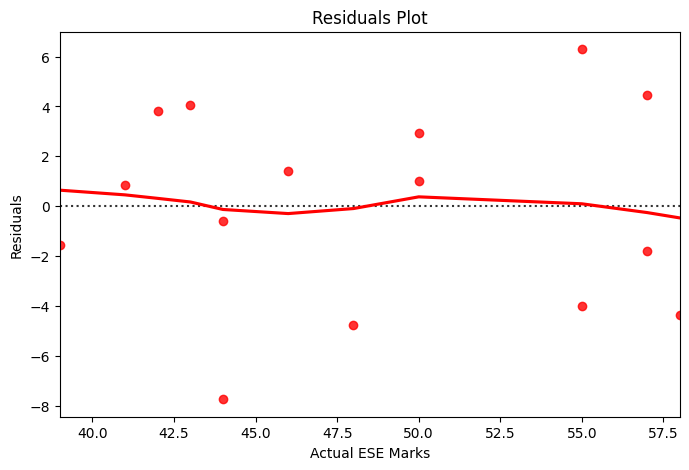

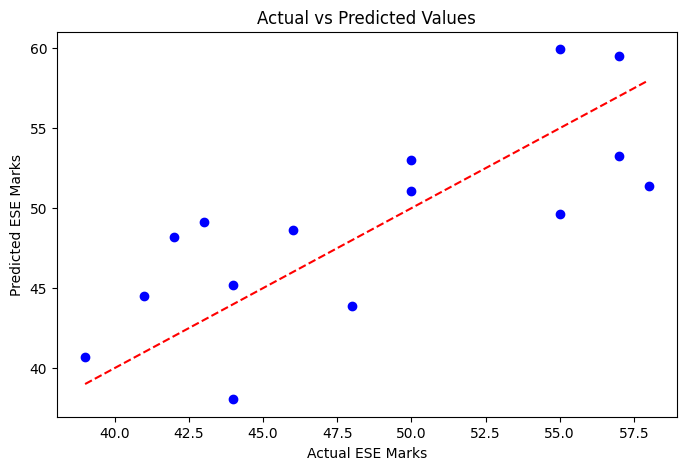

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values to original scale
y_pred_original = y_pred * data['ESE'].std() + data['ESE'].mean() # Assuming y was standardized earlier
y_test_original = y_test * data['ESE'].std() + data['ESE'].mean()

# Calculate evaluation metrics on original scale
mse = mean_squared_error(y_test_original, y_pred_original)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-Squared (R^2): {r2:.3f}")

# Visualize residuals
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, color='red', lowess=True)
plt.title('Residuals Plot')
plt.xlabel('Actual ESE Marks')
plt.ylabel('Residuals')
plt.show()

# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual ESE Marks')
plt.ylabel('Predicted ESE Marks')
plt.show()

In [15]:
# Save the trained model to a file
model_file_path = '/content/linear_regression_model.pkl'
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"\nTrained model saved to: {model_file_path}")


Trained model saved to: /content/linear_regression_model.pkl
